In [77]:
import numpy as np
import functools
import time
from matplotlib import pyplot as plt
from sklearn import datasets

data = np.array([[1,5],
                [3,6],
                [4,2],
                [3,7],
                [5,8],
                [25,31],
                [27,33],
                [23,25],
                [31,28],
                [33,31],
                [55,54],
                [59,51],
                [63,65],
                [56,62],
                [61,61]])

data_1d = np.array([1,5,3,2,6,25,26,24,27,28,53,52,50,49,51])
print(data_1d.ndim)
print(data.ndim)
#data_1d = data_1d.reshape(-1,1)
stack = np.column_stack([data_1d.reshape(-1,1),np.zeros(np.shape(data_1d))])
stack

1
2


array([[ 1.,  0.],
       [ 5.,  0.],
       [ 3.,  0.],
       [ 2.,  0.],
       [ 6.,  0.],
       [25.,  0.],
       [26.,  0.],
       [24.,  0.],
       [27.,  0.],
       [28.,  0.],
       [53.,  0.],
       [52.,  0.],
       [50.,  0.],
       [49.,  0.],
       [51.,  0.]])

In [78]:
# def timer(func):
#     @functools.wraps(func)
#     def wrapper_timer(*args, **kwargs):
#         start = time.perf_counter()
#         #'value' is the function being timed
#         value = func(*args, **kwargs)
#         end = time.perf_counter()
#         print(f'Finished {func.__name__!r} in {end-start:.8f} seconds!')
#         return value
#     return wrapper_timer

18.21
4.4399999999999995
11.610000000000001
114.35416666666667
10.859375
4.4399999999999995
4.4399999999999995
11.610000000000001
18.21
18.21
4.4399999999999995
11.610000000000001
11.610000000000001
18.21
4.4399999999999995
18.21
11.610000000000001
4.4399999999999995
12.472222222222223
2.75
155.64749999999998
11.610000000000001
18.21
4.4399999999999995
18.21
11.610000000000001
4.4399999999999995
4.4399999999999995
18.21
11.610000000000001
[34.26, 129.65354166666668, 34.260000000000005, 34.26, 34.26, 34.26, 170.8697222222222, 34.26, 34.26, 34.26]


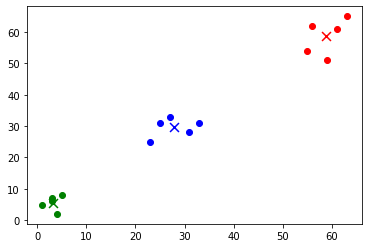

In [103]:
class k_means():
    def __init__(self, data, k):
        if data.ndim == 1:
            self.data = np.column_stack([data.reshape(-1,1),np.zeros(np.shape(data))])
        else:
            self.data = data
        self.k = k
    def ini_centroids(self, data, k):
        lst = []
        data_len = len(self.data)
        choices = np.random.choice(range(data_len), size=self.k, replace=False)
        for i in choices:
            lst.append([self.data[i]])
        #print('centroids = ' + str(lst))
        #print([i[0] for i in lst])
        return [i[0] for i in lst]
    def clusters(self,centroids):
        #print('cluster centroids = ' + str(centroids))
        cluster_vals = [[] for i in range(len(centroids))]
        #print(cluster_vals)
        for y in self.data:
            distances = []
            for x in centroids:
                distances.append(np.linalg.norm(y - x))
            #print(distances)
            idx = distances.index(min(distances))
            #print(idx)
            cluster_vals[idx].append(y)
        for i in range(len(cluster_vals)):
            if len(cluster_vals[i]) == 0:
                cluster_vals[i].append(centroids[i])
        #print(cluster_vals)               
        return cluster_vals
    def update(self,clust_vals):
        cluster_means = []
        for x in clust_vals:
            cluster_means.append(sum(x[::])/len(x))
            #print('x = ' + str(x))
        #print('means = ' + str(cluster_means))
        return self.clusters(cluster_means)
    #@timer
    def k_means_func(self):
        centroids = self.ini_centroids(self.data, self.k)
        cluster_values = self.clusters(centroids)
        updates = self.update(cluster_values)
        count = 0
        for i in range(len(updates)):
            if not np.array_equal(np.round(updates[i][0],3), np.round(self.update(updates)[i][0],3)):
                count += 1
                updates = self.update(updates)
                #print(updates)
        #print('It took ' + str(count) + ' cycles!')
        return updates
    def k_means_repeat(self):
        clusters = []
        variances = []
        for r in range(10):
            clusters.append(self.k_means_func())
        for x in clusters:
            count = 0
            for i in range(self.k):
                count += np.var(x[i])
                print(np.var(x[i]))
            #print(count)
            variances.append(count)
        print(variances)
        return clusters[variances.index(np.min(variances))]
    def plot(self):
        test_plot = self.k_means_func()
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print('test array = ' + str(np.mean(test_array[0][:,0])))
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
    def plot_2(self):
        test_plot = self.k_means_repeat()
        #print(test_plot)
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print(test_array)
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
        
test = k_means(data, 3)    
#test.k_means_repeat()

test.plot_2()

4.609999999999999
170.0
651.25
689.1875
625.3333333333334
119.2275
612.6875
119.2275
676.3333333333334
4.609999999999999
651.25
170.0
495.0625
651.25
119.2275
170.0
4.609999999999999
651.25
170.0
651.25
4.609999999999999
4.609999999999999
170.0
651.25
4.609999999999999
170.0
651.25
170.0
4.609999999999999
651.25
[825.86, 1433.7483333333334, 1408.2483333333334, 825.86, 1265.54, 825.86, 825.86, 825.86, 825.86, 825.86]


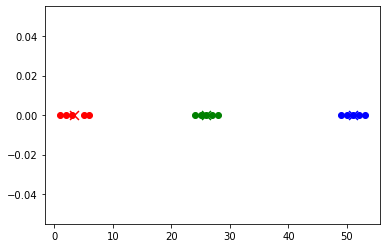

In [94]:
one_d = k_means(data_1d,3)
one_d.plot_2()

In [81]:
iris = datasets.load_iris()
#iris['data']

In [82]:
from sklearn.decomposition import PCA
import pandas as pd
numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(iris['data'])

projected = pca.transform(iris['data'])
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,len(iris['data'])+1))
projected

,pc1,pc2
1,-2.684126,0.319397
2,-2.714142,-0.177001
3,-2.888991,-0.144949
4,-2.745343,-0.318299
5,-2.728717,0.326755
...,...,...
146,1.944110,0.187532
147,1.527167,-0.375317
148,1.764346,0.078859
149,1.900942,0.116628


[3.476361716210361, 3.6974536100506494, 3.712555585804468, 4.003088548375916, 4.149990682273208, 3.6974536100506494, 4.877406941496295, 3.7617366839393176, 4.215386021395121, 3.9633830177327343]


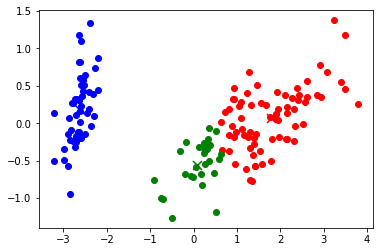

In [83]:
projected_np = projected.to_numpy()
projected_np
projected_k = k_means(projected_np,3)
projected_k.plot_2()


In [84]:
print(np.var(np.array([[ 1.,  0.],
       [ 5.,  0.],
       [ 3.,  0.],
       [ 2.,  0.],
       [ 6.,  0.]])))

4.609999999999999


In [95]:
print(np.var(np.array([[53.,  0.],
       [52.,  0.],
       [50.,  0.],
       [49.,  0.],
       [51.,  0.]])))

651.25


In [96]:
print(np.var([[53],
             [52],
             [50],
             [49],
             [51]]))

2.0


In [99]:
dtest = np.array([[53],
             [52],
             [50],
             [49],
             [51],
             [1],
             [5],
            [3],
                  [2],
                  [6],
                  [24],
                  [25],
                  [26],
                  [27],
                  [28]])

In [104]:
dtest_k = k_means(dtest,3)
dtest_k.plot_2()

2.0
3.44
2.0
2.0
2.0
3.44
3.44
2.0
2.0
2.0
3.44
2.0
2.0
3.44
2.0
130.41000000000003
0.25
0.6666666666666666
0.6666666666666666
158.25
0.25
2.0
2.0
3.44
2.0
2.0
3.44
3.44
2.0
2.0
[7.4399999999999995, 7.4399999999999995, 7.4399999999999995, 7.4399999999999995, 7.4399999999999995, 131.32666666666668, 159.16666666666666, 7.4399999999999995, 7.4399999999999995, 7.4399999999999995]


IndexError: index 1 is out of bounds for axis 1 with size 1